In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
catherinerasgaitis_mxmh_survey_results_path = kagglehub.dataset_download('catherinerasgaitis/mxmh-survey-results')

print('Data source import complete.')


Using Colab cache for faster access to the 'mxmh-survey-results' dataset.
Data source import complete.


Context
Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind

In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv')
df = data.copy()
df


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.isna().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


In [5]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


In [6]:
# BPM has the most NAN values
df['BPM']=df['BPM'].fillna(df['BPM'].median())


In [7]:
df['Fav genre'].value_counts()

,count
Fav genre,
Rock,188
Pop,114
Metal,88
Classical,53
Video game music,44
EDM,37
Hip hop,35
R&B,35
Folk,30


/tmp/ipython-input-3552601846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['Fav genre'],palette="bright")


<Axes: xlabel='count', ylabel='Fav genre'>

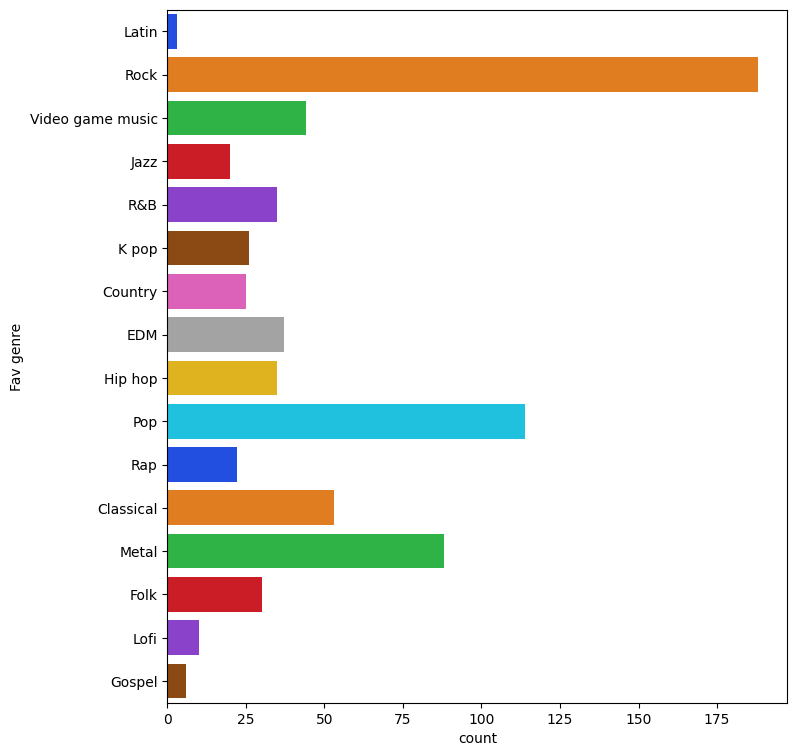

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,9))
sns.countplot(y = df['Fav genre'],palette="bright")

Rock music has the highest count and latin has the lowest count of listeners

In [9]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Pre Processing

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

#X = df.drop(['Depression', 'Anxiety', 'Insomnia', 'OCD'], axis=1)
y1 = df['Anxiety']
y2 = df['Depression']
y3 = df['Insomnia']
y4 = df['OCD']
y = np.column_stack((y1, y2, y3, y4))

X = df.drop(['Anxiety', 'Depression', 'Insomnia', 'OCD'], axis=1)

def binarize(y, threshold=5):
    return (y >= threshold).astype(int)

y = binarize(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=df['Fav genre'],
    random_state=42
)

In [12]:
y.shape, X.shape

((736, 4), (736, 29))

In [13]:
y_train[:5]

array([[1, 0, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 0],
       [1, 1, 1, 1]])

In [14]:
#checking categorical values for one hot encoding
X.select_dtypes(include="object").columns

Index(['Timestamp', 'Primary streaming service', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects',
       'Permissions'],
      dtype='object')

In [15]:
# Checking numerical values for scaling
X.select_dtypes(exclude="object").columns

Index(['Age', 'Hours per day', 'BPM'], dtype='object')

Let's make sure the Favorite genre feature of both sets have the same number of values:

In [16]:
len(X_train['Fav genre'].value_counts())

16

In [17]:
len(X_test['Fav genre'].value_counts())

16

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class Remover(BaseEstimator, TransformerMixin):

    def __init__(self, useless):
        self.useless = useless

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        X_copy = X_copy.drop(self.useless, axis=1)

        return X_copy

# Pipeline

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [20]:
useless = ["Timestamp", "Permissions"]

cat_stuff = X_train.columns[X_train.dtypes == 'object']
cat_stuff = cat_stuff.difference(useless)
cat_stuff = cat_stuff.tolist()

num_stuff = X_train.columns.difference(useless).difference(cat_stuff)
num_stuff = num_stuff.tolist()

In [21]:
num_pipeline = Pipeline ([
    ("imputer", SimpleImputer(strategy="mean")),
    ("std", StandardScaler())
])

cat_pipeline = Pipeline ([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder())
])

core_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_stuff),
    ("num", num_pipeline, num_stuff)
])

full_pipeline = Pipeline ([
    ("remover", Remover(useless)),
    ("core_pipeline", core_pipeline)
])

In [22]:
from sklearn import set_config
set_config(display="diagram")

In [23]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('std', StandardScaler())])

In [24]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one_hot', OneHotEncoder())])

In [25]:
core_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot', OneHotEncoder())]),
                                 ['Composer', 'Exploratory', 'Fav genre',
                                  'Foreign languages', 'Frequency [Classical]',
                                  'Frequency [Country]', 'Frequency [EDM]',
                                  'Frequency [Folk]', 'Frequency [Gospel]',
                                  'Frequency [Hip hop]', 'Frequency [Jazz]',
                                  'Frequency [K pop]', 'Frequency [Latin]',
                                  'Frequency [Lofi]', 'Frequency [Metal]',
                                  'Frequency [Pop]', 'Frequency [R&B]',
                                  'Frequency [Rap]', 'Frequency [Rock]',
                                  'Frequency [Video game music]',
                                  'Instrumentalist', 'Music effects',
                                  'Primary streaming service',
                                  'While working']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('std', StandardScaler())]),
                                 ['Age', 'BPM', 'Hours per day'])])

In [26]:
full_pipeline

Pipeline(steps=[('remover', Remover(useless=['Timestamp', 'Permissions'])),
                ('core_pipeline',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['Composer', 'Exploratory',
                                                   'Fav genre',
                                                   'Foreign languages',
                                                   'Frequency [Classical]',
                                                   'Frequency [Country]',
                                                   'Frequency [EDM]',
                                                   'Frequ...
                                                   'Frequency [K pop]',
                                                   'Frequency [Latin]',
                                                   'Frequency [Lofi]',
                                                   'Frequency [Metal]',
                                                   'Frequency [Pop]',
                                                   'Frequency [R&B]',
                                                   'Frequency [Rap]',
                                                   'Frequency [Rock]',
                                                   'Frequency [Video game '
                                                   'music]',
                                                   'Instrumentalist',
                                                   'Music effects',
                                                   'Primary streaming service',
                                                   'While working']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'BPM',
                                                   'Hours per day'])]))])

In [27]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)

In [28]:
X_train.shape, X_test.shape

((588, 102), (148, 102))

In [29]:
y_train.shape

(588, 4)

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [32]:
pipe_1 = make_pipeline(MultiOutputClassifier(RandomForestClassifier()))
pipe_2 = make_pipeline(MultiOutputClassifier(DecisionTreeClassifier()))
pipe_3 = make_pipeline(MultiOutputClassifier(SVC(kernel='rbf', decision_function_shape='ovo')))
pipe_4 = make_pipeline(MultiOutputClassifier(SVC(kernel='poly', decision_function_shape='ovo')))
pipe_5 = make_pipeline(MultiOutputClassifier(KNeighborsClassifier()))
pipe_6 = make_pipeline(MultiOutputClassifier(XGBClassifier()))
pipe_7 = make_pipeline(MultiOutputClassifier(CatBoostClassifier(verbose=100)))
pipe_8 = make_pipeline(MultiOutputClassifier(GradientBoostingClassifier()))


In [33]:
pipelines = [pipe_1,pipe_2,pipe_3,pipe_4,pipe_5,pipe_6,pipe_7,pipe_8]

In [34]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

Learning rate set to 0.008212
0:	learn: 0.6911953	total: 66.7ms	remaining: 1m 6s
100:	learn: 0.5572813	total: 638ms	remaining: 5.68s
200:	learn: 0.4859932	total: 939ms	remaining: 3.73s
300:	learn: 0.4323290	total: 1.46s	remaining: 3.38s
400:	learn: 0.3889069	total: 1.71s	remaining: 2.56s
500:	learn: 0.3504309	total: 2.23s	remaining: 2.22s
600:	learn: 0.3168922	total: 2.75s	remaining: 1.82s
700:	learn: 0.2879617	total: 3.27s	remaining: 1.4s
800:	learn: 0.2609280	total: 3.53s	remaining: 876ms
900:	learn: 0.2358605	total: 3.85s	remaining: 423ms
999:	learn: 0.2148670	total: 4.25s	remaining: 0us
Learning rate set to 0.008212
0:	learn: 0.6919645	total: 6.13ms	remaining: 6.13s
100:	learn: 0.5985507	total: 293ms	remaining: 2.61s
200:	learn: 0.5329110	total: 802ms	remaining: 3.19s
300:	learn: 0.4799685	total: 1.54s	remaining: 3.57s
400:	learn: 0.4360220	total: 2.11s	remaining: 3.15s
500:	learn: 0.3996581	total: 2.26s	remaining: 2.25s
600:	learn: 0.3671460	total: 2.41s	remaining: 1.6s
700:	learn

In [35]:
num = [x for x in range(0,8)]
cat = ['rf', 'dt','svc1','svc2','knn','xgb','cat','gbc']

In [36]:
pipe_dict = dict(zip(num,cat))
pipe_dict

{0: 'rf',
 1: 'dt',
 2: 'svc1',
 3: 'svc2',
 4: 'knn',
 5: 'xgb',
 6: 'cat',
 7: 'gbc'}

In [37]:
for name, model in enumerate(pipelines):   # pipelines = your dict of trained models
    print("{} test accuracy : {}".format(pipe_dict[name],model.score(X_train,y_train)))

rf test accuracy : 1.0
dt test accuracy : 1.0
svc1 test accuracy : 0.38605442176870747
svc2 test accuracy : 0.8435374149659864
knn test accuracy : 0.33503401360544216
xgb test accuracy : 1.0
cat test accuracy : 0.9642857142857143
gbc test accuracy : 0.6802721088435374


# classification report for each model

In [39]:
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

results = {}

for name, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name]=acc

    print(f"\n--- {pipe_dict[name]} ---")
    print(classification_report(y_test, y_pred))



--- rf ---
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        95
           1       0.55      0.71      0.62        73
           2       0.49      0.35      0.41        51
           3       1.00      0.03      0.05        40

   micro avg       0.60      0.63      0.61       259
   macro avg       0.68      0.51      0.47       259
weighted avg       0.65      0.63      0.55       259
 samples avg       0.56      0.50      0.49       259


--- dt ---
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        95
           1       0.49      0.56      0.53        73
           2       0.34      0.51      0.41        51
           3       0.27      0.35      0.31        40

   micro avg       0.46      0.53      0.49       259
   macro avg       0.44      0.50      0.46       259
weighted avg       0.49      0.53      0.50       259
 samples avg       0.43      0.40      0.37       259